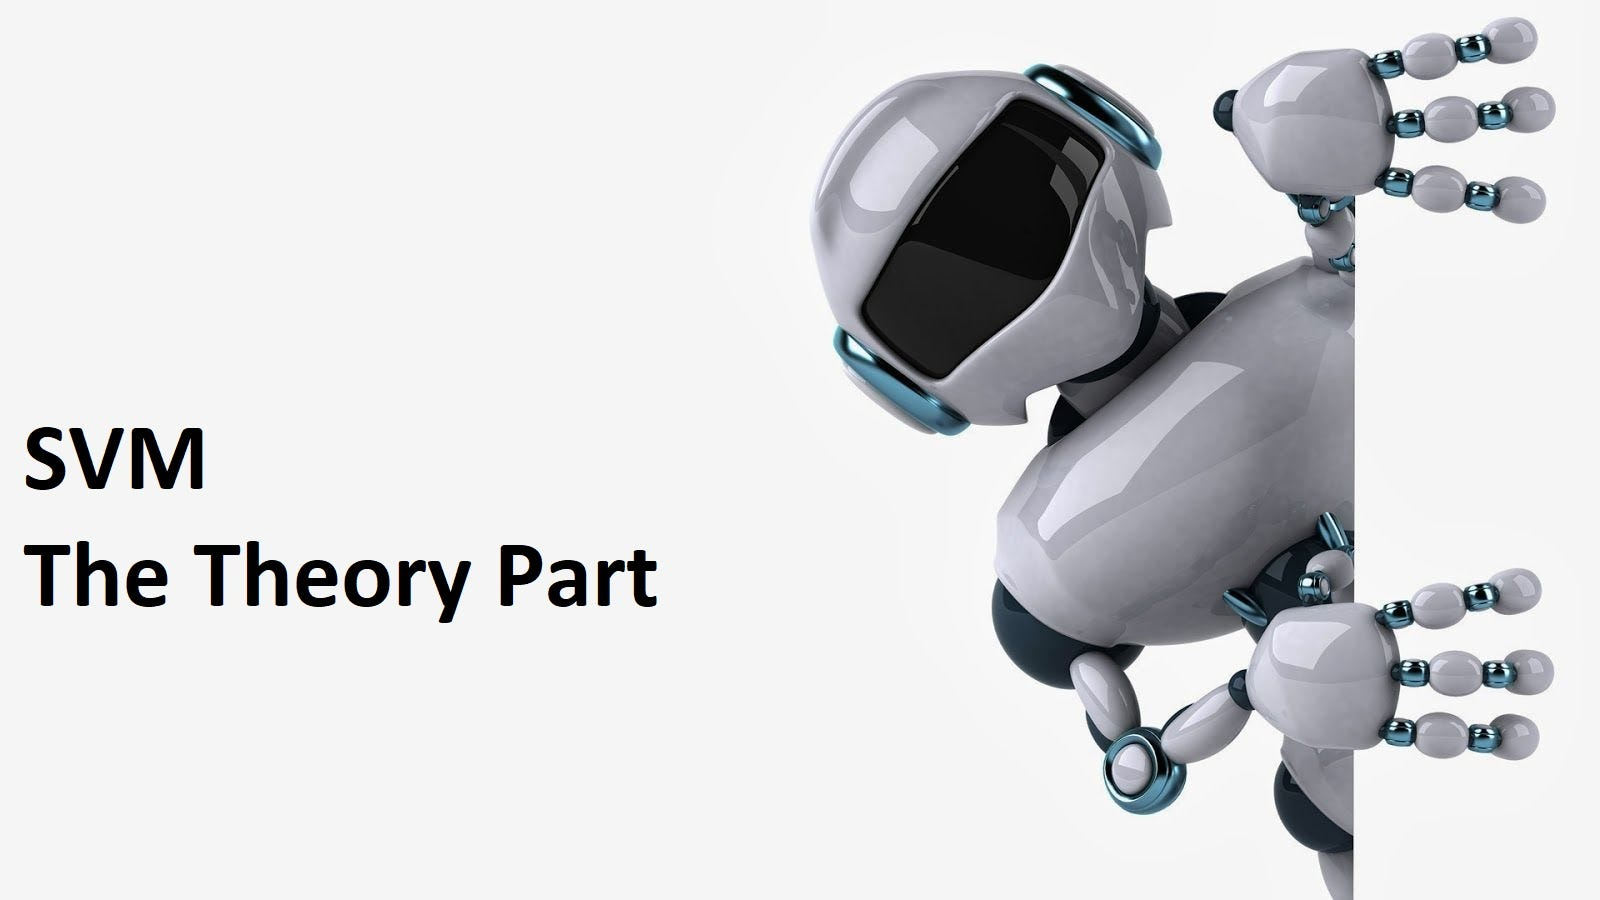

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Introduction to Support Vector Machines** <a class="anchor" id="1"></a>



**Support Vector Machines** (SVMs in short) are machine learning algorithms that are used for classification and regression purposes. SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.

The original SVM algorithm was developed by Vladimir N Vapnik and Alexey Ya. Chervonenkis in 1963. At that time, the algorithm was in early stages. The only possibility is to draw hyperplanes for linear classifier. In 1992, Bernhard E. Boser, Isabelle M Guyon and Vladimir N Vapnik suggested a way to create non-linear classifiers by applying the kernel trick to maximum-margin hyperplanes. The current standard was proposed by Corinna Cortes and Vapnik in 1993 and published in 1995.

SVMs can be used for linear classification purposes. In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using the **kernel trick**. It enable us to implicitly map the inputs into high dimensional feature spaces.




# **Support Vector Machines intuition** <a class="anchor" id="2"></a>



Now, we should be familiar with some SVM terminology. 


### Hyperplane

A hyperplane is a decision boundary which separates between given set of data points having different class labels. The SVM classifier separates data points using a hyperplane with the maximum amount of margin. This hyperplane is known as the `maximum margin hyperplane` and the linear classifier it defines is known as the `maximum margin classifier`.


### Support Vectors

Support vectors are the sample data points, which are closest to the hyperplane.  These data points will define the separating line or hyperplane better by calculating margins.


### Margin

A margin is a separation gap between the two lines on the closest data points. It is calculated as the perpendicular distance from the line to support vectors or closest data points. In SVMs, we try to maximize this separation gap so that we get maximum margin.

The following diagram illustrates these concepts visually.


### Margin in SVM

![Margin in SVM](https://static.wixstatic.com/media/8f929f_7ecacdcf69d2450087cb4a898ef90837~mv2.png)


### SVM Under the hood

In SVMs, our main objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum margin hyperplane in the following 2 step process –


1.	Generate hyperplanes which segregates the classes in the best possible way. There are many hyperplanes that might classify the data. We should look for the best hyperplane that represents the largest separation, or margin, between the two classes.

2.	So, we choose the hyperplane so that distance from it to the support vectors on each side is maximized. If such a hyperplane exists, it is known as the **maximum margin hyperplane** and the linear classifier it defines is known as a **maximum margin classifier**. 


The following diagram illustrates the concept of **maximum margin** and **maximum margin hyperplane** in a clear manner.


### Maximum margin hyperplane

![Maximum margin hyperplane](https://static.packt-cdn.com/products/9781783555130/graphics/3547_03_07.jpg)






# **Linear SVM Classification**

- A linear SVM classifier fits the “widest possible street” between the classes.
    - The solid line in the right image represents the decision boundary of this SVM.
    - It not only separates the two classes, but also stays as far away from the closest training example as possible.
- The decision boundary is determined or supported by the examples located on the edge of the street. These examples are called “support vectors.”

- **Large margin classification**
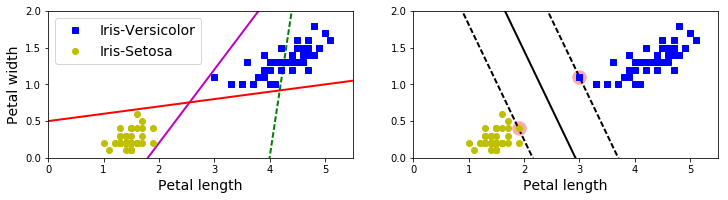

- **Sensitivity to feature scales**
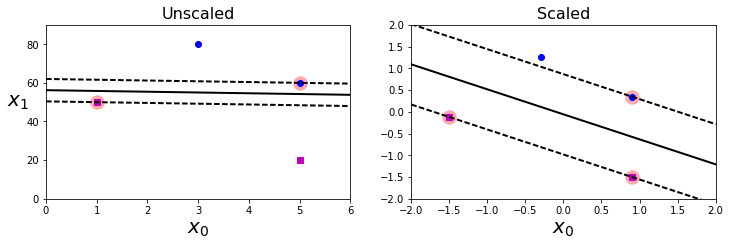

# **Hard Margin Classification**

- Hard margin classification: if we impose that all examples must be off the street and on the correct side.
- Problems: only works for linear separable, and is sensitive to outliers


- **Hard margin sensitivity to outliers**

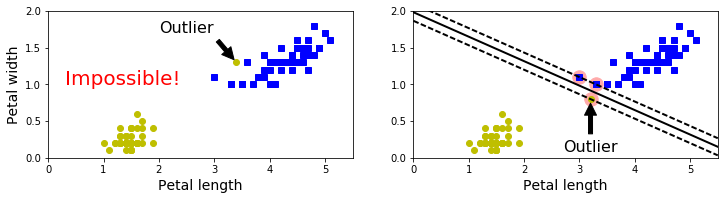

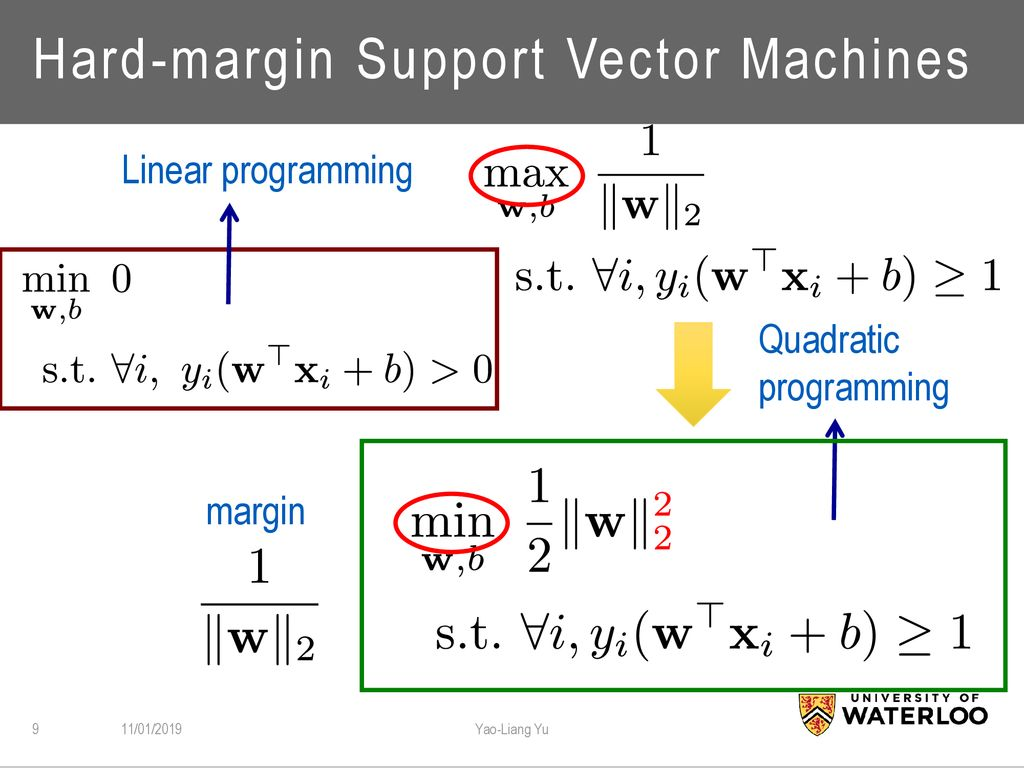


# **Soft Margin Classification**
- To be more flexible, soft margin classification tries to balance between margin size (keep the street as wide as possible) and margin violations (keep the number of examples in the street or even on the wrong side as small as possible).
- Scikit-Learn: LinearSVC provides a hyperparameter called C. The smaller it is, the wider the street with more violations.
- Reducing C can help with overfitting

- **Large margin (left) versus fewer margin violations (right)**


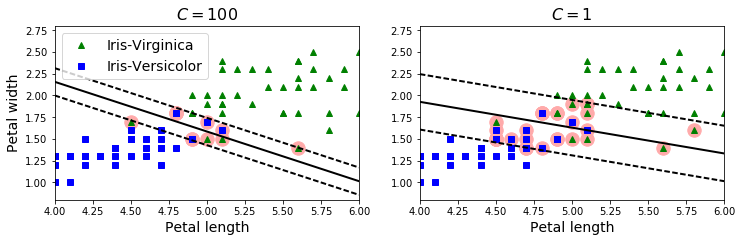

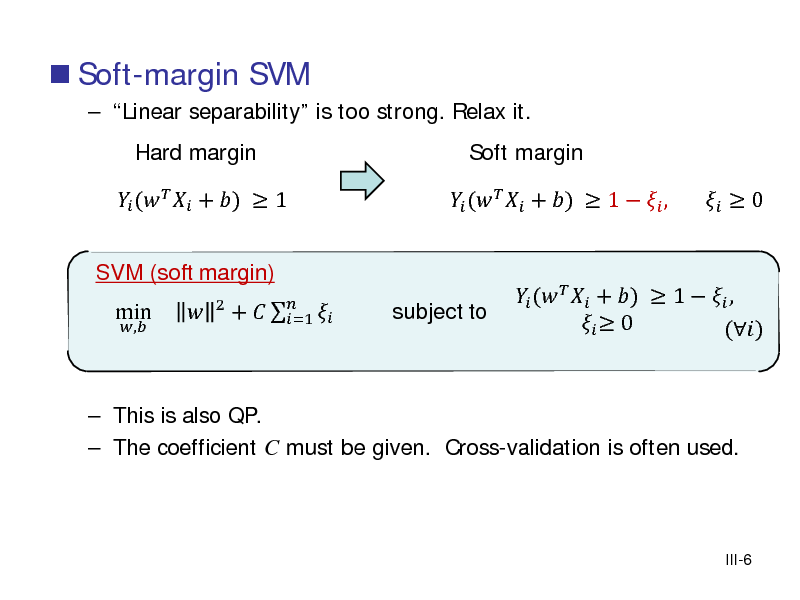

In [4]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

scaler = StandardScaler()


svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])


svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])

scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])




svm_clf.fit(X, y)
scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [8]:
svm_clf.predict([[5.5, 1.7]]), scaled_svm_clf1.predict([[5.5, 1.7]]), scaled_svm_clf2.predict([[5.5, 1.7]])

(array([1.]), array([1.]), array([1.]))

# **Nonlinear SVM Classification**
- Many datasets are not even close to being linearly separable. 
- By adding features we can add extra features to the dataset to make it linear separable.
        - One feature x1 alone is not separable.
        - Adding feature x2 = (x1)2 makes the dataset separable.

- **Adding features to make a dataset linearly separable**
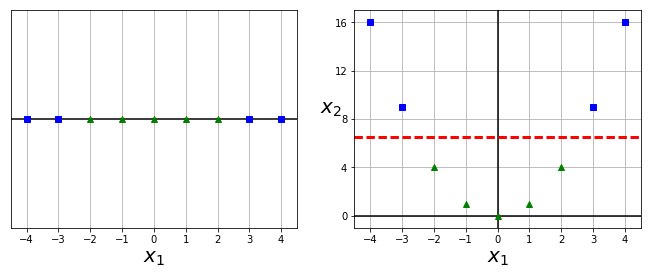

### Problem with dispersed datasets


Sometimes, the sample data points are so dispersed that it is not possible to separate them using a linear hyperplane. 
In such a situation, SVMs uses a `kernel trick` to transform the input space to a higher dimensional space as shown in the diagram below. It uses a mapping function to transform the 2-D input space into the 3-D input space. Now, we can easily segregate the data points using linear separation.


### Kernel trick - transformation of input space to higher dimensional space

![Kernel trick](http://www.aionlinecourse.com/uploads/tutorials/2019/07/11_21_kernel_svm_3.png)


# **Kernel trick** <a class="anchor" id="3"></a>



In practice, SVM algorithm is implemented using a `kernel`. It uses a technique called the `kernel trick`. In simple words, a `kernel` is just a function that maps the data to a higher dimension where data is separable. A kernel transforms a low-dimensional input data space into a higher dimensional space. So, it converts non-linear separable problems to linear separable problems by adding more dimensions to it. Thus, the kernel trick helps us to build a more accurate classifier. Hence, it is useful in non-linear separation problems.

We can define a kernel function as follows-


### Kernel function

![Kernel function](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTodZptqcRor0LGo8Qn7_kJB9n9BACMt6jgIPZ4C3g_rgh_uSRZLQ&s)

In the context of SVMs, there are 4 popular kernels – `Linear kernel`,`Polynomial kernel`,`Radial Basis Function (RBF) kernel` (also called Gaussian kernel) and `Sigmoid kernel`. These are described below -

## **Linear kernel**

In linear kernel, the kernel function takes the form of a linear function as follows-

**linear kernel : K(xi , xj ) = xiT xj**

Linear kernel is used when the data is linearly separable. It means that data can be separated using a single line. It is one of the most common kernels to be used. It is mostly used when there are large number of features in a dataset. Linear kernel is often used for text classification purposes.

Training with a linear kernel is usually faster, because we only need to optimize the C regularization parameter. When training with other kernels, we also need to optimize the γ parameter. So, performing a grid search will usually take more time.

Linear kernel can be visualized with the following figure.

### Linear Kernel

![Linear Kernel](https://scikit-learn.org/stable/_images/sphx_glr_plot_svm_kernels_thumb.png)

## **Sigmoid kernel**

Sigmoid kernel has its origin in neural networks. We can use it as the proxy for neural networks. Sigmoid kernel is given by the following equation –

**sigmoid kernel : k (x, y) = tanh(αxTy + c)**

Sigmoid kernel can be visualized with the following diagram-

### Sigmoid kernel

![Sigmoid kernel](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTKeXbOIlniBXYwMYlEYLKPwZZg8vFU1wVm3RWMACjVcT4iBVDy&s)

## **Polynomial Kernel**

Polynomial kernel represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables. The polynomial kernel looks not only at the given features of input samples to determine their similarity, but also combinations of the input samples.

For degree-d polynomials, the polynomial kernel is defined as follows –

**Polynomial kernel : K(xi , xj ) = (γxiT xj + r)d , γ > 0**

Polynomial kernel is very popular in Natural Language Processing. The most common degree is d = 2 (quadratic), since larger degrees tend to overfit on NLP problems. It can be visualized with the following diagram.

### Polynomial Kernel

![Polynomial Kernel](https://www.researchgate.net/profile/Cheng_Soon_Ong/publication/23442384/figure/fig12/AS:341444054274063@1458418014823/The-effect-of-the-degree-of-a-polynomial-kernel-The-polynomial-kernel-of-degree-1-leads.png)

In [10]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

X, y = make_moons(n_samples=100, noise=0.15)

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [11]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

## **SVM classifiers with a polynomial kernel**
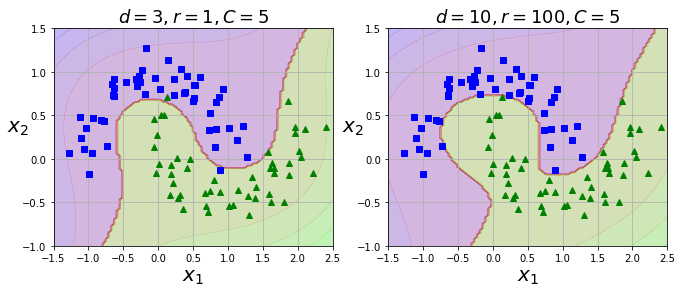

## **Radial Basis Function Kernel**

Radial basis function kernel is a general purpose kernel. It is used when we have no prior knowledge about the data. The RBF kernel on two samples x and y is defined by the following equation –


### Radial Basis Function kernel

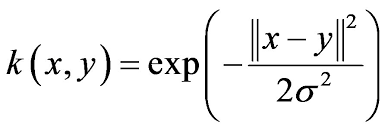

The following diagram demonstrates the SVM classification with rbf kernel.

### SVM Classification with rbf kernel

![SVM Classification with rbf kernel](https://www.researchgate.net/profile/Periklis_Gogas/publication/286180566/figure/fig5/AS:304327777374210@1449568804246/An-example-of-an-SVM-classification-using-the-RBF-kernel-The-two-classes-are-separated.png)

## **Similarity features using the Gaussian RBF**
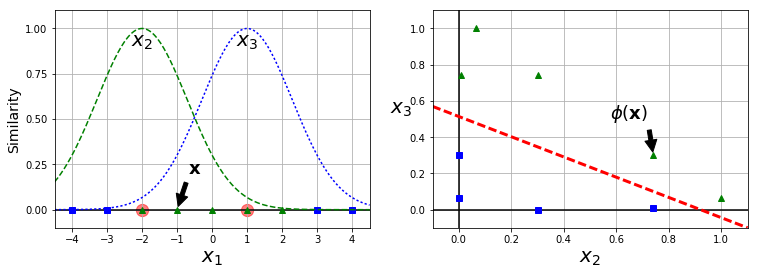


In [13]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

<div class = "alert alert-warning">
<ui><li>Hyperparameter γ: the bigger, the decision boundary becomes more irregular, more wiggling around the examples.</li></ui>
<ui><li>If overfitting, try reduce γ, and C as well.</li></ui>
</div>



## **SVM classifiers using an RBF kernel**
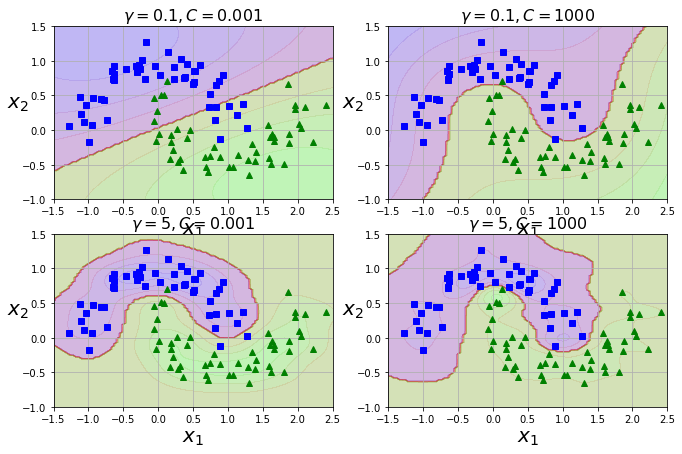

<div class = "alert alert-warning">
    <h2>Computational Complexity
</h2>
<ui><li>When the dataset is very large and has many features, try Linear SVM</li></ui>
<ui><li>It dataset is not very large, try SVC’s Guassian RBF which tends to work better than Linear SVM.</li></ui>
</div>

In [15]:
import pandas as pd

data = {
    'Class': ['LinearSVC', 'SGDClassifier', 'SVC'],
    'Time complexity': ['O(m × n)', 'O(m × n)', 'O(m² × n) to O(m³ × n)'],
    'Out-of-core support': ['No', 'Yes', 'No'],
    'Scaling required': ['Yes', 'Yes', 'Yes'],
    'Kernel trick': ['No', 'No', 'Yes']
}

df = pd.DataFrame(data)
df

,Class,Time complexity,Out-of-core support,Scaling required,Kernel trick
0,LinearSVC,O(m × n),No,Yes,No
1,SGDClassifier,O(m × n),Yes,Yes,No
2,SVC,O(m² × n) to O(m³ × n),No,Yes,Yes


<div class = "alert alert-info">
    <h1>SVM Regression</h1>

<p>SVM algorithm is versatile: not only does it support linear
and nonlinear classification, but it also supports linear and nonlinear regression. To
use SVMs for regression instead of classification, the trick is to reverse the objective:
instead of trying to fit the largest possible street between two classes while limiting
margin violations, SVM Regression tries to fit as many instances as possible on the
    street while limiting margin violations (i.e., instances off the street)</p>

<ui><li>Width controlled by epsilon hyperparameter.</li></ui>
Below: random linear dataset. two training results with different vals of epsilon.
</div>

In [16]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)


LinearSVR(epsilon=1.5, random_state=42)

 ## **SVM Regression**
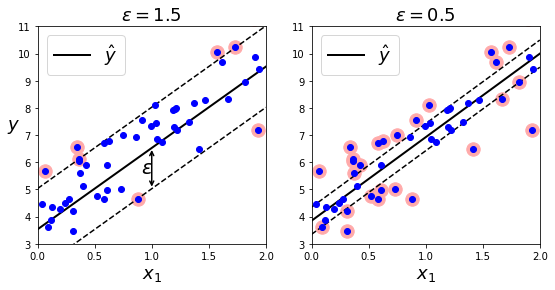

In [18]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

### **SVM Regression using a second-degree polynomial kernel**
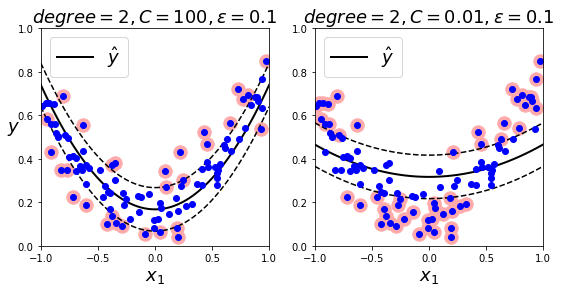

<div class = "alert alert-danger">
<h1>Decision Function and Predictions</h1>

<p>The linear SVM classifier model predicts the class of a new instance x by simply com‐
puting the decision function w⊺ x + b = w1 x1 + ⋯ + wn xn + b. If the result is positive,
the predicted class ŷ is the positive class (1), and otherwise it is the negative class (0);</p>
</div>

<div class = "alert alert-warning">
<h4>Linear SVM classifier prediction</h4>

<ui><li>y =
0 (if wTـ
    x + b < 0)</li></ui>

<ui><li>y = 
1 (if wTـ
x + b ≥ 0)</li></ui>

</div>

## **Decision function for the iris datase**
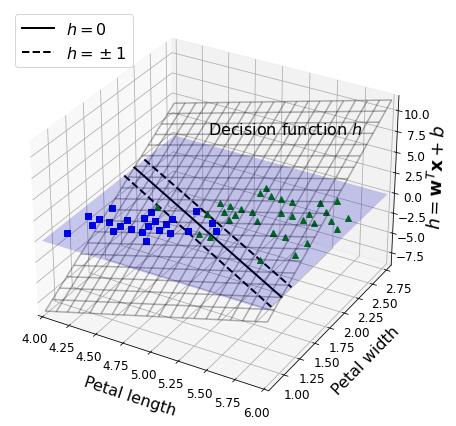

<!-- <div class ="alert alert-inf"> -->
    
<h1>Training Objectives</h1>

<ui><li>Slope of a decision function equals a weight vector's norm (||w||)</li></ui>
<ui><li>Divide slope by 2 ==> any points where decision function = +1/-1 will be 2x away from decision boundary.</li></ui>

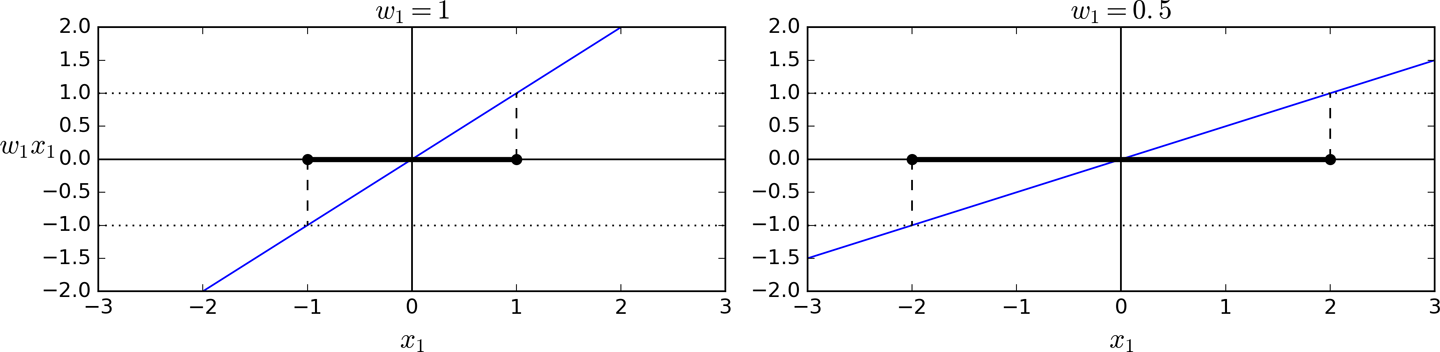

<ui><li>So we want minimal ||w|| to get max margins</li></ui>
<ui><li>If we also want zero margin violations, then decision function needs to be GT1 (positive) and LT1 (negative).</li></ui>
<ui><li>If soft margins OK - need to define a slack variable (C) for tradeoff.</li></ui>
    
<!-- </div> -->

In [20]:
import pandas as pd

data = {
    'Kernel Type': ['Linear', 'Polynomial', 'Gaussian RBF', 'Sigmoid'],
    'Kernel Function': [
        'K(a, b) = a * bـ',
        'K(a, b) = γaــb + r',
        'K(a, b) = exp(−γ * |a − b|²)',
        'K(a, b) = tanh(γaــb) + r'
    ]
}

df = pd.DataFrame(data)
df

,Kernel Type,Kernel Function
0,Linear,"K(a, b) = a * bـ"
1,Polynomial,"K(a, b) = γaــb + r"
2,Gaussian RBF,"K(a, b) = exp(−γ * |a − b|²)"
3,Sigmoid,"K(a, b) = tanh(γaــb) + r"


<div class = "alert alert-info">
<h1>Hinge Loss</h1>


<p>The function max(0, 1 – t) is called the hinge loss function.
It is equal to 0 when t ≥ 1. Its derivative (slope) is equal to –1 if t < 1 and 0 if t > 1. It is
not differentiable at t = 1, but just like for Lasso Regression, you can still use Gradient Descent using any subderivative at t = 1 (i.e.,any value between –1 and 0).</p>
</div>


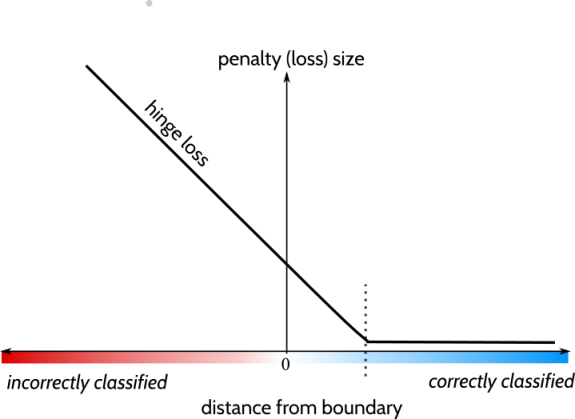